# **ML Project: Exoplanet Hunting in Deep Space**
**Alken Rrokaj r0772839, Fatjon Barçi r0732033**

### Motivation:
Exoplanet hunting in deep space is done by tracking a star over several months or years, to observe if there is a regular 'dimming' of the flux (the light intensity). This is light dimming, is evidence that there may be an orbiting body around the star, such as a planet. This star could be considered to be a 'candidate' system for further depth observations, for example by a satellite that captures light at a different wavelength, could solidify the belief that the candidate can in fact be 'confirmed'. Using a machine learning model is probably the only logical method of making this tedious task possible. 

### Dataset Description: 
[Exoplanet Hunting in Deep Space](https://www.kaggle.com/datasets/keplersmachines/kepler-labelled-time-series-data)

### Trainset:
* 5087 rows or observations.
* 3198 columns or features. // too many features. Try downsampling.
* Column 1 is the label vector. Columns 2 - 3198 are the flux values over time.
* 37 confirmed exoplanet-stars and 5050 non-exoplanet-stars.

### Testset:
* 570 rows or observations.
* 3198 columns or features.
* Column 1 is the label vector. Columns 2 - 3198 are the flux values over time.
* 5 confirmed exoplanet-stars and 565 non-exoplanet-stars. -->
<!-- 
### References:
Let’s find planets beyond our solar system & milky way … . Available at: https://medium.datadriveninvestor.com/lets-find-planets-beyond-our-solar-system-milky-way-galaxy-with-the-help-of-905dcfc95d3d (Accessed: November 7, 2022). 



## **Importing the Data**

In [114]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split

import os

In [115]:
# read the train data
train_df = pd.read_csv('./exoTrain.csv')
train_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


## **Data Analysis**
Extracting Features

In [116]:
# extracting features per star measurement
train_df.T.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
0,3198.0,9.951370,160.703410,-1053.97,-103.3550,0.00,118.6675,504.46
1,3198.0,-7.424984,60.001869,-371.27,-25.1750,0.02,21.4275,252.64
2,3198.0,8.187151,281.832418,-874.95,-129.6000,0.00,158.3100,1274.59
3,3198.0,-4.644509,103.222642,-268.41,-78.1900,0.00,69.5175,370.29
4,3198.0,-14.235582,407.057716,-1808.76,-268.0625,0.06,315.3525,924.32


Seperate the data in two lists, based on whether they have exoplanets or not

In [117]:
def seperateLabels(x_dataframe):
    exoplanets = []
    no_exoplanets = []
    for i in range(len(x_dataframe)):
        if x_dataframe['LABEL'][i] == 2:
            exoplanets.append(np.array(x_dataframe.iloc[i,1:]))
        else:
            no_exoplanets.append(np.array(x_dataframe.iloc[i,1:]))
            
    no_exoplanets = np.array(no_exoplanets[1:])
    exoplanets = np.array(exoplanets[1:])
    return no_exoplanets, exoplanets 

In [118]:
no_exoplanets, exoplanets = seperateLabels(train_df)

In [119]:

print('no_exoplanets')
pd.DataFrame(no_exoplanets).T.describe().T.head()

no_exoplanets


,count,mean,std,min,25%,50%,75%,max
0,3197.0,4.212268,63.013855,-571.03,-20.49,0.0,21.88,600.11
1,3197.0,0.891442,41.128459,-334.82,-17.19,0.0,17.97,963.98
2,3197.0,4.850673,140.215612,-292.36,-112.75,0.0,128.85,1464.33
3,3197.0,33.159481,1675.513760,-6054.62,-43.81,0.0,45.29,93373.95
4,3197.0,-5.518486,187.767970,-607.96,-106.94,0.0,88.81,1547.14


In [120]:
print('exoplanets')
pd.DataFrame(exoplanets).T.describe().T.head()

exoplanets


,count,mean,std,min,25%,50%,75%,max
0,3197.0,-7.427932,60.011024,-371.27,-25.18,0.01,21.43,252.64
1,3197.0,8.189087,281.876484,-874.95,-129.67,-0.08,158.31,1274.59
2,3197.0,-4.646587,103.238723,-268.41,-78.19,-0.01,69.52,370.29
3,3197.0,-14.240660,407.121292,-1808.76,-268.09,0.02,315.40,924.32
4,3197.0,18.015580,155.684307,-402.60,-89.37,-0.02,122.85,1087.88


## **Data Visualization**

In [121]:
def plotTheData(data_name, title, ylimit, xlimit, rang=10):
    plt.figure(figsize=(15,5))  
    if rang == 0:
        rang = len(data_name)-1
    for i in range(0,rang):
        plt.plot(data_name[i])
        if ylimit != 0:
            plt.ylim([-1*ylimit,ylimit])
        if xlimit != 0:
            plt.xlim(0,xlimit);
    plt.title(label=title)
    plt.show()  

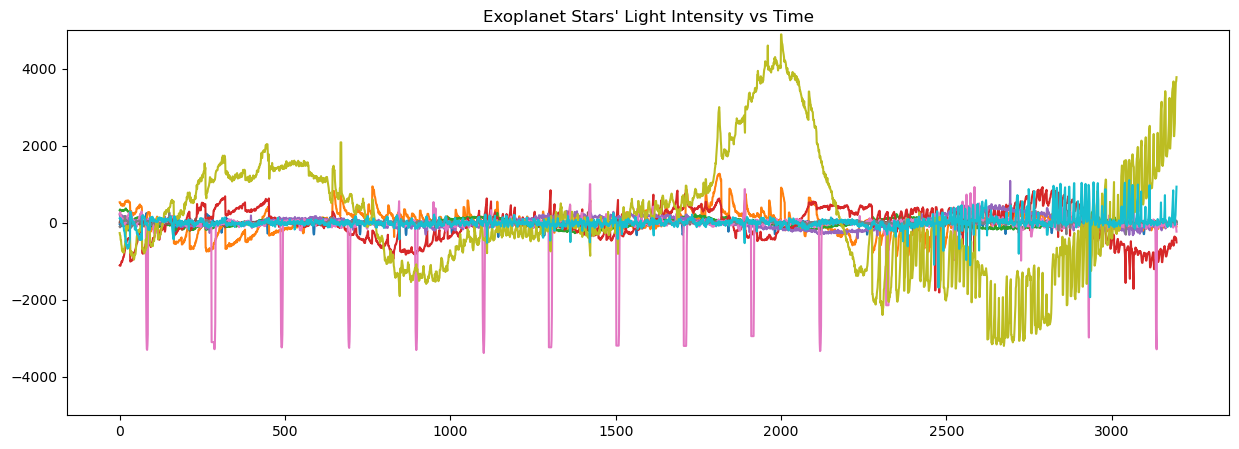

In [122]:
plotTheData(exoplanets,'Exoplanet Stars\' Light Intensity vs Time', 5000,0,10)

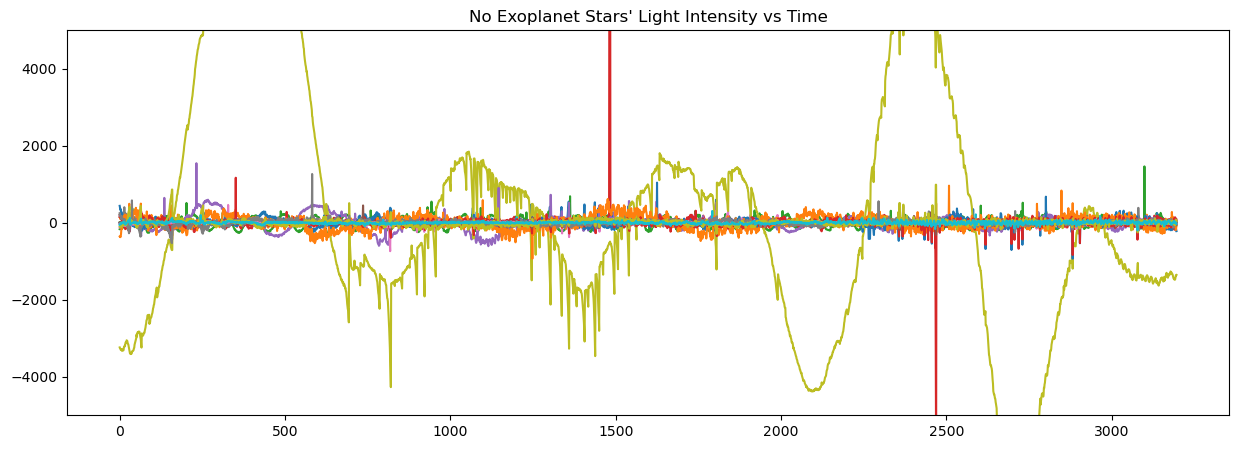

In [123]:
plotTheData(no_exoplanets,'No Exoplanet Stars\' Light Intensity vs Time', 5000,0,20)

Now we normalize the data in based on max intensity of each star, this would make the absolute magnitude more similar with the other stars.

In [124]:
def featureNormalizeArray(X_array):
    normalized_array = []
    for X in X_array:
        normalized_array.append(featureNormalize(X))
    return np.array(normalized_array)
        
# Code Assignment starts here
# EX1. Optional Exercises: 
# 3.1 Feature Normalization     
def featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of  xeach feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    """
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape)
    sigma = np.zeros(X.shape)

    # =========================== YOUR CODE HERE =====================
    mu = np.mean(X, axis=0)
    X_norm = X - mu

    sigma = np.std(X_norm, axis=0, ddof=1)
    X_norm /= sigma
    # ================================================================
    return X_norm
# Code Assignment stops here

In [125]:
normalized_exo = featureNormalizeArray(exoplanets)
normalized_no_exo = featureNormalizeArray(no_exoplanets)

In [126]:
ones = np.ones(len(normalized_no_exo), dtype=int)
twos = np.full(len(normalized_exo),2,dtype=int)

first = pd.DataFrame(normalized_exo)
first.insert(0,'LABEL',twos)
second = pd.DataFrame(normalized_no_exo)
second.insert(0,'LABEL',ones)      

normalized_whole = pd.concat([first,second],axis= 0)

In [ ]:
plotTheData(normalized_exo,'Normalized Exoplanet Stars\' Light Intensity vs Time',20,0)

In [ ]:
plotTheData(normalized_no_exo,'Normalized No Exoplanet Stars\' Light Intensity vs Time',20,0)

# **Data Balancing**
In this part of code we balance the classes using the SMOTE technique. 

First we separate the data and the labels.


In [128]:
x_train = normalized_whole.drop(['LABEL'], axis=1)
y_train = normalized_whole['LABEL']


Next create an instance of the SMOTE class with a random seed of 69.

In [130]:
smote = SMOTE (random_state = 69) 

This line of code applies the SMOTE oversampling technique to the training data, which is stored in x_train and y_train. The fit_sample method fits the SMOTE model to the training data and generates synthetic minority class samples, which are then combined with the original training data. The resulting oversampled dataset is stored in x_train and y_train. Finally the oversampled data is split into a new training and test set considering that the test set is also very imbalanced.

In [131]:
x_train, y_train = smote.fit_resample (x_train, y_train.ravel ())
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=1)

In [132]:
print(type(x_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [134]:
x_train.insert(0,'LABEL',y_train)


In [135]:
print(x_train)
#whole_set = pd.concat([x_train,y_train],axis = 1)
#print(whole_set)

       LABEL         0         1         2         3         4         5  \
3018       1 -0.143396 -0.277350 -0.168650 -0.025424 -0.055069  0.093403   
9881       2  0.859821  0.899229  0.795944  0.782534  1.039373  0.965951   
1627       1 -1.206391 -1.320700 -1.486071 -1.444553 -1.384325 -1.477660   
10057      2 -1.382249 -1.640477 -1.555978 -0.905361 -0.886967 -0.815349   
6099       2  1.234861  1.203895  1.311435  1.236497  1.207308  1.168205   
...      ...       ...       ...       ...       ...       ...       ...   
2895       1  1.089102  1.028134  0.279408  0.609917  0.347328  0.168169   
7813       2 -1.898364 -1.851545 -1.873943 -1.868533 -1.709269 -1.701604   
905        1 -0.216564 -0.235953 -0.118421  0.000799  0.074639 -0.022681   
5192       2 -0.522070 -0.736748 -0.803546 -0.736982 -1.019521 -1.265303   
235        1 -0.799202 -2.319782 -2.588291 -1.813408 -1.822164 -2.554727   

              6         7         8  ...      3187      3188      3189  \
3018   0.2567

Checking the size of each class

In [ ]:
# no_exoplanets_oversampled, exoplanets_oversampled = seperateLabels(x_train)
exoplanets_oversampled = []
no_exoplanets_oversampled = []
for i in range(len(x_train)):
    if x_train.iloc[i]['LABEL'] == 2:
        exoplanets_oversampled.append(x_train.iloc[i,1:])
    else:
        no_exoplanets_oversampled.append(x_train.iloc[i,1:])
    

In [ ]:
no_exoplanets_oversampled = np.array(no_exoplanets_oversampled[1:])
exoplanets_oversampled = np.array(exoplanets_oversampled[1:])

print(no_exoplanets_oversampled[0])
print(len(exoplanets_oversampled))

In [ ]:
plotTheData(exoplanets_oversampled,'exoplanets_oversampled\' Light Intensity vs Time',0,0)

In [ ]:
plotTheData(normalized_exo,'Normalized Exoplanet Stars\' Light Intensity vs Time',0,0)

## **Machine Learning Part**

### Method
This was our first trial at a machine learning method. We first wanted to compare different methods and their accuracy, using the sklearn library.
We have used Logistic Regression to do a simple Classsification of the data. The preliminary results are not optimal with around 50% accuarcy.

The next step is to evaluate the possibility of using Neural Networks or Support Vector Machines, this is due to the low number of positives (37 out of 5087 total stars).

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression

In [ ]:
val_df = pd.read_csv('./exoTest.csv')